# Metoda spadku gradientu (gradient descent)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def f(x):
    return(x**2 - 6*x + 12)
    
def grad_f(x):
    return(2*x - 6)


from IPython import display


def visualise_gradient_decsent(f=f,grad_f=grad_f,theta = -2, learning_rate=0.8, sec=3, x = np.linspace(-5,11,100)):

    
    y = f(x)
    
    for i in range(100):

        plt.figure(figsize=(10,10))
        plt.plot(x,y,c="blue")
        plt.scatter(theta,0,s=60)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.vlines(x=theta,ymin=0,ymax=f(theta))
        #plt.show()


        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        theta_new = theta - learning_rate*grad_f(theta)


        plt.arrow(theta, f(theta), 2, 2*grad_f(theta), head_width = 0.3,head_length = 0.3 )

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)


        plt.text(-1,40,"grad = %.3f" % grad_f(theta), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-2,30,"step = -1 *  %.2f * %.2f = " % (learning_rate,grad_f(theta)), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-2,30,"step = -1 *  %.2f * %.2f = %.2f" % (learning_rate,grad_f(theta), -learning_rate*grad_f(theta)), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)



        delta = theta_new - theta

        plt.text(min(theta,theta_new),3,"step = %.3f" % ( -learning_rate*grad_f(theta)), fontsize=20)
        plt.arrow(theta, 0, 0.9*delta, 0, head_width = 1,head_length = np.abs(0.1*delta),color="red" )

        display.display(plt.gcf())

        #plt.annotate('', xy=(theta, 10), xytext=(theta_new, 10),
        #                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
        #                   va='center', ha='center')
        theta = theta_new

        plt.vlines(x=theta,ymin=0,ymax=f(theta))
        #plt.show()

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

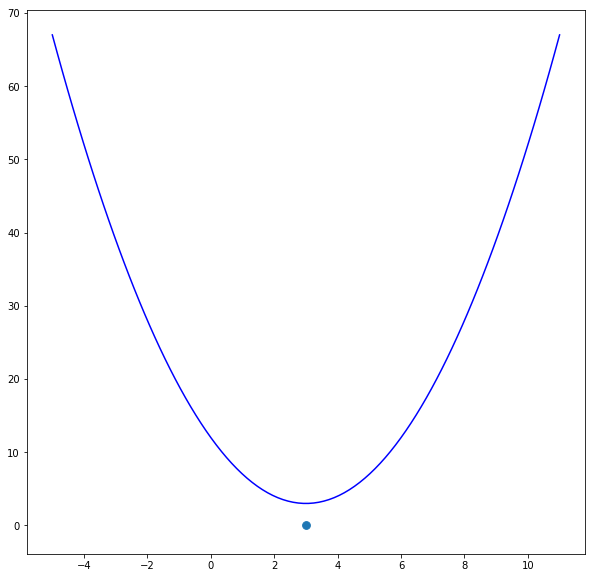

KeyboardInterrupt: 

In [2]:
visualise_gradient_decsent(learning_rate=0.3)

In [ ]:
visualise_gradient_decsent(sec=1)

In [ ]:
visualise_gradient_decsent(learning_rate=1,sec=1)

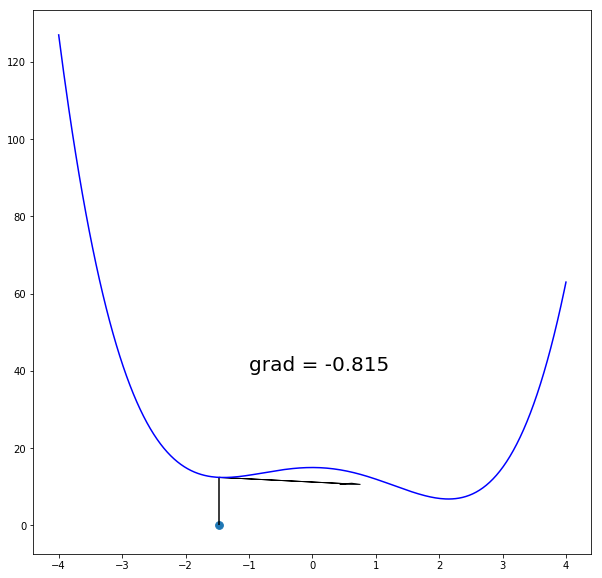

KeyboardInterrupt: 

In [4]:
def f(x):
    return(0.5*(x**4 - x**3 - 6*x**2 + 30) )

def grad_f(x):
    return(0.5*(4*x**3 - 3*x**2 - 12*x))

visualise_gradient_decsent(f,grad_f,theta=-3,learning_rate=0.02,x=np.linspace(-4,4,300),sec=1)

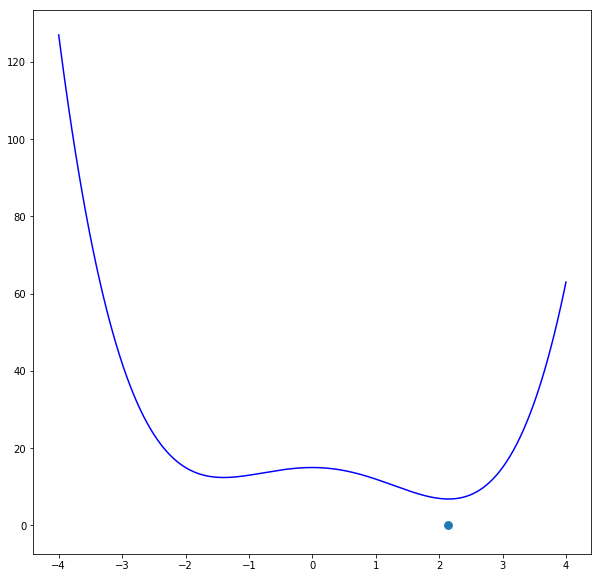

KeyboardInterrupt: 

In [6]:
visualise_gradient_decsent(f,grad_f,theta=-3,learning_rate=0.1,x=np.linspace(-4,4,300),sec=1)

## Gradient decsent:
$$ Cost(\theta) = \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$
$$\theta_k = \theta_k - learning\_rate * \frac{dCost}{d\theta_k}$$

## Stochastic gradient decsent:

$$ Cost(\theta) = \sum\limits_{i \in \{ i_1, ..., i_r \}}^n f(x_i,y_i,\theta),$$ $$ \ \ \text{gdzie} \ \ \{ i_1, ..., i_r \} - \text{losowy podzbiór obserwacji}$$
$$\theta_i = \theta_i - learning\_rate * \frac{df}{d\theta_j}$$

# Neuron

<img src="http://blog.zabarauskas.com/img/perceptron.gif" width="400">
Źródło: http://blog.zabarauskas.com/img/perceptron.gif


In [1]:
# wzor na wyznaczenie wyjscia taki sam jak w regresji logistycznej. roznia sie sposobem wyznaczania parametrow. 
# w sieciach neuronowych wykorzystywany jest spadek gradientu.

# Neuron jako klasyfikator - perceptron

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

class Perceptron(object):

    def __init__(self, eta=0.1, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.w_[0] = -50
        self.w_[1] = 10
        self.w_[2] = 1
        self.errors_ = []
        
        for i in range(self.epochs):
            
            plt.figure(figsize=(5,5))
        
            errors = 0
            for xi, target in zip(X, y):
                
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
                
            plt.scatter(X[:,0],X[:,1],c=y)
            plt.plot(np.linspace(4,7,100),-1 * (self.w_[0]+self.w_[1]*np.linspace(4,7,100))/self.w_[2])
            plt.title('Perceptron')
            plt.xlabel('sepal length [cm]')
            plt.ylabel('petal length [cm]')
            plt.xlim(4,7)
            plt.ylim(-1,6)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1)

            self.errors_.append(errors)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Wizualizacja procesu uczenia

In [ ]:
import pandas as pd

df = pd.read_csv('Dane/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

ppn = Perceptron(epochs=20, eta=0.15)
ppn.train(X, y)

# Wielowarstwowa sieć neuronowa

(*Multilayer perceptron*, *feedforward neural network*)

<img src="https://www.intechopen.com/source/html/39071/media/f2.jpg" width="700">
Źródło: https://www.intechopen.com/source/html/39071/media/f2.jpg


# Wizualizacja obszarów decyzyjnych w zalezności od liczby neuronów

<img src="http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-hidden-layer-varying-655x1024.png" width="700">
Źródło: http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-hidden-layer-varying-655x1024.png



### Fakt matematyczny: jednowarstwową siecią możemy otrzymać dowolny kształt. Co z tego wynika? To, że (teoretycznie) zawsze wystarczy sieć jednowarstwowa (odpowiednio duża).

# 1. Sieci wielowarstwowe - klasyfikacja na zwykłym zbiorze, testowanie warstw, dropoutów

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [5]:
# na regresje liniowa nie ma wplywu przeskalowanie danych. ale na regularyzacje przeskalowanie danych ma juz wplyw.
# regularyzacja jest domyslnie wlaczona w pythonie w regresji
# w sieciach neuronowych powinnismy zawsze przeskalowac dane (skalowanie standardowe lub do przedziału [0,1])

In [2]:
# load data
dataset = np.loadtxt('Dane/pima-indians-diabetes.data', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

print(X.shape)
print(np.mean(Y))

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


####
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
####


models = [LogisticRegression(),DecisionTreeClassifier(),SVC(probability=True), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), RandomForestClassifier()]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = [round(value) for value in y_pred]

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

(768, 8)
0.348958333333
Accuracy: 77.95% AUC:  0.828435319377
Accuracy: 70.47% AUC:  0.674584004294
Accuracy: 75.20% AUC:  0.834541062802
Accuracy: 77.17% AUC:  0.830716586151
Accuracy: 73.62% AUC:  0.785963499732
Accuracy: 72.05% AUC:  0.776402308105


In [7]:
from sklearn.neural_network import MLPClassifier

In [17]:
?MLPClassifier

In [15]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


####
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
####

for h_dim in [1,2,3,5,10,25,60,100,200,500,1000]:
              
    model = MLPClassifier((h_dim,))

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = [round(value) for value in y_pred]

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

/Users/lukasz/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy: 36.22% AUC:  0.594001610306
Accuracy: 75.59% AUC:  0.806092324208
Accuracy: 73.62% AUC:  0.816056092324
Accuracy: 75.20% AUC:  0.819779924852
Accuracy: 74.02% AUC:  0.807232957595
Accuracy: 75.98% AUC:  0.830850778315
Accuracy: 78.74% AUC:  0.831253354804
Accuracy: 79.13% AUC:  0.827764358561
Accuracy: 75.98% AUC:  0.820652173913
Accuracy: 75.20% AUC:  0.815284487386
Accuracy: 74.02% AUC:  0.803878153516


In [16]:
# 5 neuronów daly taki sam wynik jak 500 neuronow

In [49]:
# Parametry MLPClassifier:
# relu => funkcja aktywacji (activation): dla x < 0 na wyjsciu daje 0, dla x > 0 pozostawia bez zmian
# max_iter - maksymalna ilosc iteracji
# tol - parametr tolerancji, jaka roznica pomiedzy kolejnymi krokami zatrzymuje iteracji
# early_stopping - walidacji jakosci modelu poprzez obliczania funkcji kosztu na danych testowych a nie uczacych, 
# jesli po dwoch epokach nie nastapila poprawa wyniku to uczenie jest zatrzymywane
# validation_fraction - jaka czesc danych zostanie wydzielona do testow

In [19]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


####
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
####

for h_dim in [1,2,3,5,10,25,60,100,200,500,1000]:
              
    model = MLPClassifier((h_dim,), activation='logistic')

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = [round(value) for value in y_pred]

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

/Users/lukasz/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy: 63.78% AUC:  0.776301663983
Accuracy: 66.93% AUC:  0.816358024691
Accuracy: 69.29% AUC:  0.80152979066
Accuracy: 74.02% AUC:  0.819578636608
Accuracy: 75.20% AUC:  0.822061191626
Accuracy: 77.17% AUC:  0.825818572195
Accuracy: 77.56% AUC:  0.82769726248
Accuracy: 77.56% AUC:  0.826757917338
Accuracy: 77.17% AUC:  0.826623725174
Accuracy: 75.59% AUC:  0.823738593666
Accuracy: 77.17% AUC:  0.826355340848


In [24]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


####
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
####

for h_dim in [1,2,3,5,10,25,60,100,200,500,1000]:
              
    model = MLPClassifier((h_dim,), tol=0.01)

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = [round(value) for value in y_pred]

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 63.78% AUC:  0.524557165862
Accuracy: 67.72% AUC:  0.746712292002
Accuracy: 42.13% AUC:  0.673309178744
Accuracy: 63.78% AUC:  0.333132045089
Accuracy: 45.67% AUC:  0.470679012346
Accuracy: 66.14% AUC:  0.688942565754
Accuracy: 70.08% AUC:  0.751744498121
Accuracy: 76.38% AUC:  0.816156736447
Accuracy: 77.17% AUC:  0.825885668277
Accuracy: 75.59% AUC:  0.826221148685
Accuracy: 75.20% AUC:  0.829441760601


In [33]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


####
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
####

for h_dim in [1,2,3,5,10,25,60,100,200,500,1000]:
              
    model = MLPClassifier((h_dim,), activation='logistic', max_iter=1000, tol=0)

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = [round(value) for value in y_pred]

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

/Users/lukasz/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy: 75.59% AUC:  0.827630166398
Accuracy: 77.17% AUC:  0.835950080515
Accuracy: 77.56% AUC:  0.83655394525
Accuracy: 77.17% AUC:  0.835010735373
Accuracy: 77.17% AUC:  0.835547504026
Accuracy: 77.17% AUC:  0.835077831455
Accuracy: 78.35% AUC:  0.829643048846
Accuracy: 77.17% AUC:  0.828234031133
Accuracy: 78.35% AUC:  0.828032742888
Accuracy: 77.56% AUC:  0.827965646806
Accuracy: 76.77% AUC:  0.827093397746


In [34]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


####
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
####

for h_dim in [1,2,3,5,10,25,60,100,200,500,1000]:
              
    model = MLPClassifier((h_dim,), activation='logistic', max_iter=1000, tol=0)

    model.fit(X_train, y_train)
    
    y_fit = model.predict_proba(X_train)[:,1]
    predictions_fit = [round(value) for value in y_fit]
    
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = [round(value) for value in y_pred]

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_train,y_true=predictions_fit))

/Users/lukasz/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy: 77.17% AUC:  0.769265422451
Accuracy: 77.17% AUC:  0.774703887004
Accuracy: 77.56% AUC:  0.763121649792
Accuracy: 77.17% AUC:  0.782052744662
Accuracy: 76.77% AUC:  0.784018627896
Accuracy: 77.17% AUC:  0.790972864632
Accuracy: 78.35% AUC:  0.761757110814
Accuracy: 77.95% AUC:  0.760446906035
Accuracy: 77.56% AUC:  0.771160962072
Accuracy: 76.77% AUC:  0.763040062844
Accuracy: 76.38% AUC:  0.753554943419


In [36]:
# gdy siec jest przeuczona to wynik na danych uczacych jest duzo lepszy od wyniku na danych testowych, np. 90 do 70
# w naszym przypadku nie ma przeuczenia

In [39]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


####
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
####

for h_dim1, h_dim2 in [(3,3),(3,30),(30,3),(30,30),(100,100),(1000,3)]:
              
    model = MLPClassifier((h_dim1,h_dim2), activation='logistic', max_iter=10000, tol=0)

    model.fit(X_train, y_train)
    
    y_fit = model.predict_proba(X_train)[:,1]
    predictions_fit = [round(value) for value in y_fit]
    
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = [round(value) for value in y_pred]

    accuracy = accuracy_score(y_test, predictions)
    print(h_dim1, h_dim2, "Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_train,y_true=predictions_fit))

3 3 Accuracy: 76.38% AUC:  0.766613517583
3 30 Accuracy: 76.77% AUC:  0.771445535596
30 3 Accuracy: 77.95% AUC:  0.814053672316
30 30 Accuracy: 77.17% AUC:  0.78303117506
100 100 Accuracy: 77.56% AUC:  0.770106518128
1000 3 Accuracy: 75.98% AUC:  0.800878815911


In [40]:
# Wczytaj dane treningowe i testowe

import pandas as pd
import numpy as np
train_set = pd.read_csv('Dane/adult.data', header = None)
test_set = pd.read_csv('Dane/adult.test',skiprows = 1, header = None) # Make sure to skip a row for the test set


col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

# Usun braki danych (oznaczone jako ' ?')

train = train_set.replace(' ?', np.nan).dropna()
test = test_set.replace(' ?', np.nan).dropna()



dataset = pd.concat([train,test])

# Zamien zmienna objasniana na binarna
dataset['wage_class'] = dataset.wage_class.replace({' <=50K.': 0,' <=50K':0, ' >50K.':1, ' >50K':1})

#Usun zmienna fnlwgt
dataset.drop(["fnlwgt"],axis=1,inplace=True)

#Zaproponuj sposbob obluzenia informacji dotyczących edukacji
dataset.drop(["education"],axis=1,inplace=True)
# Zaproponuj sposob obsluzenia tej zmiennej

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

print(X_train.shape)
X_test.shape

(30162, 45)


(15060, 45)

In [41]:
####
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
####

In [44]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [59]:
model = MLPClassifier()
params = {"hidden_layer_sizes": [X_train.shape[1]],
              "activation": ['identity', 'logistic', 'tanh', 'relu'],
             "solver": ['lbfgs', 'sgd', 'adam']}
grid = GridSearchCV(estimator=model, param_grid=params, cv=ShuffleSplit(n_splits=1, test_size=0.1))

In [60]:
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

/Users/lukasz/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.858137222406
MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=45, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [61]:
print(grid.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': 45, 'solver': 'adam'}


In [62]:
y_pred = grid.best_estimator_.predict_proba(X_test)[:,1]
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 84.44% AUC:  0.899740733251


# Konwolucyjne siecie neuronowe

## Convolution neural networks, CNN

### Filtrowanie - konwolucja (splot):

<img src="https://i.stack.imgur.com/SKgim.jpg" width="450">

Źródło: https://i.stack.imgur.com/SKgim.jpg

# Filtry jako ekstraktory informacji

<img src="https://adeshpande3.github.io/assets/Filter.png" width="550">

<img src="https://adeshpande3.github.io/assets/OriginalAndFilter.png" width="550">

<img src="https://adeshpande3.github.io/assets/FirstPixelMulitiplication.png" width="550">

<img src="https://adeshpande3.github.io/assets/SecondMultiplication.png" width="550">

Źródło: https://adeshpande3.github.io/assets/Filter.png

### Warstwa konwolucyjna

Warstawa konwolucyjna analizuje obraz "kawałek po kawałku" i zwraca informację o poszczególnych obszarach przy użyciu filtrów.

Warstwa konwolucyjna składa się z K filtrów i zwraca K "tablic" powstałych przez przetworzenie wejścia kolejnymi filtrami.

Operacja splotu (konwolucja):

<img src="http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif" width="450">

Źródło: http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif

In [1]:
# padding - uzupelnienie obrazu o dodatkowy wiersz dookoła aby po konwolucji nie zmniejszyc rozmiaru obrazu

### Sieć konwolucyjna uczy się ekstrachować istotne informacje - parametrami sieci są wagi w filtrach!

Czyli sieć sama uczy się tego, co jest istotne w danych dla naszego celu.

W sieciach konwolucyjnych na wyjście splotu nakłada się funkcję aktywacji. Z reguły jest to ReLU:

<img src="https://ml4a.github.io/images/figures/relu.png" width="350">

Źródło: https://ml4a.github.io/images/figures/relu.png

Takie przekształcenie można interpretować w następujący sposób: jeżeli w danym obszarze jest coś co dany filtr "rozpoznaje" (wartość splotu większa od 0), to zwracamy po prostu wynik splotu. Natomiast jeśli dane nie pasują do danego filtra (wartość ujemna), to niezaleznie od tego co w tych danych jest, zwracamy 0, które mówi, że nie ma tego czego szukamy.

## Pooling (subsampling)

Pooling to agregacja informacji - zamiast przechowywać całą tablicę, którą zwrócił filtr, wyciągamy sobie po jednej "informacji" z podobszarów. W ten sposób otrzymujemy tablicę o zredukowanym wymiarze.

MaxPooling:

<img src="https://adeshpande3.github.io/assets/MaxPool.png" width="550">

Jaką informację wyekstrahuje "max pooling"?

A jaką "average pooling"?

W praktyce prawie zawsze po każdej warstwie konwolujyjnej dodaje się max pooling. (Czasem nie dodaje się poolingu na końcu wielowarstwowej sieci.)

### Wielowarstwowa sieć konwolucyjna

Naturalnym rozwiązaniem są wielowarstwowe sieci konwolucyjne.

Wówczas każda kolejna warstwa w jakiś sposób agreguje informacje z poprzedniej warstwy do ogólniejszego poziomu. Przykladowa interpretacja w kontekście klasyfikacji czy na danym zdjęciu jest człowiek:
- pierwsza warstwa: rozpoznawianie kształtów/konturów
- druga warstwa: detekcja części ciała
- trzecia: detekcja człowiek


<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

### Wyjście sieci

Ostatnia warsta konwolucyjna (lub pooling) jest rozwijana do wektora. Ten wektor jest przepuszczany przez warstwy dense, które prowadzą do predykcji. Można dokonywać predykcji bezpośrednio z rozwiniętego wektora.

### Uwaga. Filty dla obrazka 2D jest tablicą 2D. Natomiast kolejne warstwy są 3D - dochodzi wymiar liczby filtrów. Dlatego dalsze filtry są kostami 3D, które mają głębokość równą głębokości poprzedniej warstwy.

<img src="https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg" width="700">

Źródło: https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg

## Strides - wielkość kroku przesunięcia

Określa dokładność z jaką chcemy skanować dane.

Strides = (1,1)

<img src="https://adeshpande3.github.io/assets/Stride1.png" width="600">

Strides = (2,2)

<img src="https://adeshpande3.github.io/assets/Stride2.png" width="600">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/


### Jeszcze jednym parametrem jest rozmiar filtra.

# Przechodzimy do praktyki!

# Obrazki 2D (szare)

http://scikit-learn.org/0.15/auto_examples/applications/face_recognition.html

In [3]:
import numpy as np
import pandas as pd
import os
from keras.utils import np_utils

Using TensorFlow backend.


In [11]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target

target_names = lfw_people.target_names

In [12]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
y = np_utils.to_categorical(y)
y
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

X_train = np.array([x.reshape((h, w, 1)) for x in X_train])
X_test = np.array([x.reshape((h, w, 1)) for x in X_test])

X_train = X_train / 255
X_test = X_test / 255

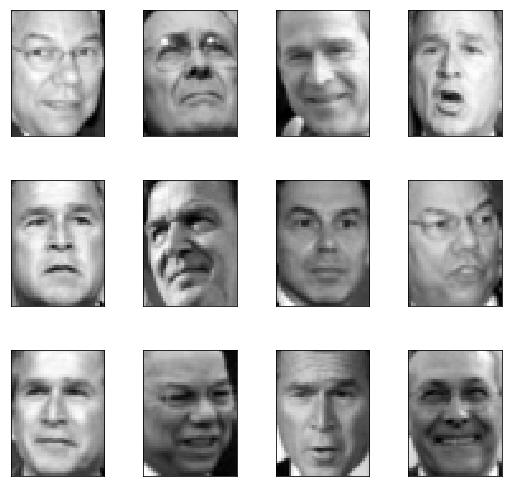

In [14]:
images = X_train[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:,:,0], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [15]:
X_train.shape

(772, 50, 37, 1)

In [16]:
y_train.shape

(772, 7)

In [17]:
X_test.shape

(516, 50, 37, 1)

### Ćwiczenie 1. Punkt odniesienia

Sprawdź klasyfikację przy użyciu perceptrona - sieć 0-warstwowa (lub 1-warstwowa licząc wyjście jako warstwę). Pamiętaj, że, aby uruchomić warstwę dense na danych, które nie są wektorem trzeba je "rozwinąć" przy uzyciu "warstwy" (operacji) Flatten. 

In [38]:
from keras.models import Sequential

from keras.layers import Dense, Flatten, Dropout
from keras.constraints import maxnorm
# keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(50,37,1)))
# pierwsza warstwa musi miec podane rozmiary danych
model.add(Dense(n_classes, activation='softmax'))
# w warstwie Dense podajemy rozmiar wyjscia
# softmax uzywamy tylko na wyjsciu

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 1850)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 12957     
Total params: 12,957
Trainable params: 12,957
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
early_stopping = EarlyStopping(patience=3, monitor='val_loss')

model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])

model.evaluate(X_test, y_test)

Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 0s - loss: 1.8682 - categorical_accuracy: 0.3005 - val_loss: 1.7075 - val_categorical_accuracy: 0.4508
Epoch 2/100
579/579 [==============================] - 0s - loss: 1.6751 - categorical_accuracy: 0.4041 - val_loss: 1.5647 - val_categorical_accuracy: 0.4560
Epoch 3/100
579/579 [==============================] - 0s - loss: 1.6013 - categorical_accuracy: 0.4111 - val_loss: 1.6200 - val_categorical_accuracy: 0.5130
Epoch 4/100
579/579 [==============================] - 0s - loss: 1.5506 - categorical_accuracy: 0.4525 - val_loss: 1.5200 - val_categorical_accuracy: 0.4715
Epoch 5/100
579/579 [==============================] - 0s - loss: 1.4867 - categorical_accuracy: 0.4698 - val_loss: 1.4370 - val_categorical_accuracy: 0.5181
Epoch 6/100
579/579 [==============================] - 0s - loss: 1.4193 - categorical_accuracy: 0.5026 - val_loss: 1.3929 - val_categorical_accuracy: 0.5285
Epoch 

[1.0412591834400975, 0.65891472868217049]

### Ćwiczenie 2.

Sprawdź klasyfikację przy użyciu sieci jednowarstwowej, dla rozmiarów stanu ukrytego: 20,50,100,150,200,300.

In [37]:
model = Sequential()
model.add(Flatten(input_shape=(50,37,1)))

model.add(Dense(200, activation='sigmoid'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 1850)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 200)               370200    
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 1407      
Total params: 371,607
Trainable params: 371,607
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
early_stopping = EarlyStopping(patience=3, monitor='val_loss')

model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])

model.evaluate(X_test, y_test)

Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 0s - loss: 1.8593 - categorical_accuracy: 0.3040 - val_loss: 1.6077 - val_categorical_accuracy: 0.4560
Epoch 2/100
579/579 [==============================] - 0s - loss: 1.6594 - categorical_accuracy: 0.4093 - val_loss: 1.6207 - val_categorical_accuracy: 0.4560
Epoch 3/100
579/579 [==============================] - 0s - loss: 1.6313 - categorical_accuracy: 0.4387 - val_loss: 1.6110 - val_categorical_accuracy: 0.4663
Epoch 4/100
579/579 [==============================] - 0s - loss: 1.5650 - categorical_accuracy: 0.4767 - val_loss: 1.4935 - val_categorical_accuracy: 0.4974
Epoch 5/100
579/579 [==============================] - 0s - loss: 1.5201 - categorical_accuracy: 0.4508 - val_loss: 1.4659 - val_categorical_accuracy: 0.5026
Epoch 6/100
579/579 [==============================] - 0s - loss: 1.4639 - categorical_accuracy: 0.4974 - val_loss: 1.4948 - val_categorical_accuracy: 0.4715
Epoch 

[1.0604021198065705, 0.62209302325581395]

### Ćwiczenie 3

Weź najlepszą sieć z poprzedniego kroku i dodaj kolejną warstwę dense - rozpatrz takie same wielkosci stanu ukrytego jak poprzednio.

### Ćwiczenie 4. Prosta sieć konwolucyjna.

Liczba filtrów: 10, wielkość filtra: 5,5.

In [40]:
model = Sequential()
model.add(Conv2D(10, (5,5), input_shape=(50,37,1)))

model.add(Flatten())

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3, monitor='val_loss')
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])
model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 33, 10)        260       
_________________________________________________________________
flatten_15 (Flatten)         (None, 15180)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 7)                 106267    
Total params: 106,527
Trainable params: 106,527
Non-trainable params: 0
_________________________________________________________________
None
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s - loss: 1.8938 - categorical_accuracy: 0.3402 - val_loss: 1.5305 - val_categorical_accuracy: 0.4767
Epoch 2/100
579/579 [==============================] - 0s - loss: 1.4896 - categorical_accuracy: 0.4387 - val_loss: 1.4374 - val_categorical_accuracy: 0.5337
Epoch 3/100
579/579 [============

[0.81257993121479832, 0.77519379844961245]

### Ćwiczenie 5. Zmień padding na "same".

In [42]:
model = Sequential()
model.add(Conv2D(10, (5,5), input_shape=(50,37,1), padding='same'))

model.add(Flatten())

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3, monitor='val_loss')
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])
model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 37, 10)        260       
_________________________________________________________________
flatten_17 (Flatten)         (None, 18500)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 7)                 129507    
Total params: 129,767
Trainable params: 129,767
Non-trainable params: 0
_________________________________________________________________
None
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s - loss: 2.0935 - categorical_accuracy: 0.3161 - val_loss: 1.6352 - val_categorical_accuracy: 0.4974
Epoch 2/100
579/579 [==============================] - 0s - loss: 1.5222 - categorical_accuracy: 0.4231 - val_loss: 1.4738 - val_categorical_accuracy: 0.4663
Epoch 3/100
579/579 [============

[0.74038098948870523, 0.77906976744186052]

In [43]:
# categorical_accuracy - accuracy na zbiorze treningowym
# cval_ategorical_accuracy - accuracy na zbiorze testowym

### Ćwiczenie 6. Badanie parametrów:

Liczby filtrów: 3, 5, 10, 15, 30

Wielkości filtrów: (3,3),(5,5),(10,10)

In [2]:
import h5py

In [51]:
N_filters = [10,15,30]
C = [3,5,10]

from itertools import product

for n_filters, c in product(N_filters, C):
    
    model = Sequential()
    model.add(Conv2D(n_filters, (c,c), input_shape=(50,37,1), padding='same'))

    model.add(Flatten())

    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

    early_stopping = EarlyStopping(patience=3, monitor='val_loss')
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)
    
    model.fit(X_train, y_train, verbose=0, validation_split=0.25, epochs=100, callbacks=[early_stopping, take_best_model], batch_size=32)
    
    model.load_weights("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    os.remove("wagi.h5py")
    print(n_filters, c, ' Accuracy test: %.2f%%' % (scores[1]*100))

ImportError: `save_model` requires h5py.

### Ćwiczenie 7. MaxPooling, AveragePooling

Przetestuj dodanie warstwy pooling po warstwie konwolucyjnej, dla konwolucji z najlepszymi parametrami.

In [ ]:
for pooling in [MaxPooling2D(pool_size=(2,2)), 
               MaxPooling2D(pool_size=(4,4)), 
               MaxPooling2D(pool_size=(6,6)), 
               AveragePooling2D(pool_size=(2,2)), 
               AveragePooling2D(pool_size=(4,4))]:

    model = Sequential()
    model.add(Conv2D(10, (5,5), input_shape=(50,37,1), padding='same'))
    model.add(pooling)
    model.add(Flatten())

    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
    print(model.summary())

    early_stopping = EarlyStopping(patience=3, monitor='val_loss')
    model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])
    model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 50, 37, 10)        260       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 18, 10)        0         
_________________________________________________________________
flatten_39 (Flatten)         (None, 4500)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 7)                 31507     
Total params: 31,767
Trainable params: 31,767
Non-trainable params: 0
_________________________________________________________________
None
Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 1s - loss: 1.7446 - categorical_accuracy: 0.3472 - val_loss: 1.6294 - val_categorical_accuracy: 0.4560
Epoch 2/100
579/579 [==============================] - 0s - l

579/579 [==============================] - 0s - loss: 0.2118 - categorical_accuracy: 0.9551 - val_loss: 0.4495 - val_categorical_accuracy: 0.8601
Epoch 60/100
579/579 [==============================] - 0s - loss: 0.2067 - categorical_accuracy: 0.9585 - val_loss: 0.4915 - val_categorical_accuracy: 0.8549
Epoch 61/100
579/579 [==============================] - 0s - loss: 0.2070 - categorical_accuracy: 0.9534 - val_loss: 0.5874 - val_categorical_accuracy: 0.8083
Epoch 62/100
579/579 [==============================] - 0s - loss: 0.2257 - categorical_accuracy: 0.9447 - val_loss: 0.4555 - val_categorical_accuracy: 0.8653
Epoch 63/100
579/579 [==============================] - 1s - loss: 0.1859 - categorical_accuracy: 0.9637 - val_loss: 0.4390 - val_categorical_accuracy: 0.8705
Epoch 64/100
579/579 [==============================] - 0s - loss: 0.1724 - categorical_accuracy: 0.9741 - val_loss: 0.4422 - val_categorical_accuracy: 0.8446
Epoch 65/100
579/579 [==============================] - 0s 

### Ćwiczenie 8. [Ten krok trwa kilkanaście minut!]

Przetestuj liczbę filtrów, ich rozmiary i rozmiar okna pooling jednoczesnie.

In [ ]:
N_filters = [15,30,40]
C = [3,5,7,10]
P = [2,4,6]


for n_filters, c, p in product(N_filters, C, P):

    

### Ćwiczenie 9.

Weź najlepszą sieć z poprzedniego kroku. Przetestuj dodanie warstwy dense, między poolingiem, a outputem.

Rozważ wymiary stanu ukrytego: 10, 30, 50.

### Ćwiczenie 10. Dwie warstwy konwolucyjne.

Zamiast warstwy dense dodanej w poprzednim kroku, wstaw warstwę konwolucyjną. Rozważ 5, 10, i 15 filtrów wymiarów 3x3, 5x5, 10x10.

### Ćwiczenie 11. 

Przetestuj dodanie do porzedniej sieci max pooling'u po drugiej warstwie konwolucyjnej, z poolsize równym (2,2) i strides równymi (1,1), (2,2). 

Pytanie na marginesie: czy strides równe (3,3), gdy poolsize = (2,2) ma sens?.

### Ćwiczenie 13.

Przetestuj ograniczenie normy filtra kernel_constraint=maxnorm(k) dla k równego 1,2,3,5,7,10,15,20,30.

### Ćwiczenie 13.

Dla najlepszej sieci przetestuj wielkości batcha: 1,5,10,15,20,30.

# Obrazki 3D (kolorowe - RGB)

(7000, 32, 32, 3)
(4000, 32, 32, 3)
(array([0, 1, 2, 3], dtype=uint8), array([1738, 1733, 1779, 1750]))
[[[170 180 198]
  [168 178 196]
  [177 185 203]
  ..., 
  [162 179 215]
  [158 178 214]
  [157 177 212]]

 [[168 181 198]
  [172 185 201]
  [171 183 200]
  ..., 
  [159 177 212]
  [156 176 211]
  [154 174 209]]

 [[154 170 186]
  [149 165 181]
  [129 144 162]
  ..., 
  [161 178 214]
  [157 177 212]
  [154 174 209]]

 ..., 
 [[ 74  84  80]
  [ 76  85  81]
  [ 78  85  82]
  ..., 
  [ 71  75  78]
  [ 68  72  75]
  [ 61  65  68]]

 [[ 68  76  77]
  [ 69  77  78]
  [ 72  79  78]
  ..., 
  [ 76  80  83]
  [ 71  75  78]
  [ 71  75  78]]

 [[ 67  75  78]
  [ 68  76  79]
  [ 69  75  76]
  ..., 
  [ 75  79  82]
  [ 71  75  78]
  [ 73  77  80]]]


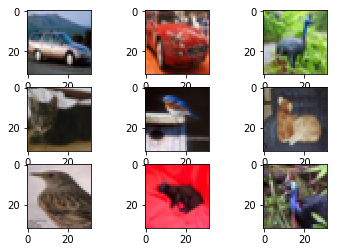

In [20]:
from keras.datasets import cifar10
from scipy.misc import toimage
import matplotlib.pyplot as pyplot

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 4
n_samples = 7000

X_train, y_train = X_train[np.where(y_train<nb_classes)[0]][:n_samples], y_train[np.where(y_train<nb_classes)[0]][:n_samples]
X_test, y_test = X_test[np.where(y_test<nb_classes)[0]], y_test[np.where(y_test<nb_classes)[0]]

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0])

# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

In [30]:
y_train = pd.get_dummies(y_train.ravel()).values

In [31]:
y_test = pd.get_dummies(y_test.ravel()).values

In [35]:
X_train = X_train / 255

In [42]:
y_train.shape, y_test.shape, X_train.shape

((7000, 4), (4000, 4), (7000, 32, 32, 3))

### Zadanie 1. Zbuduj jednowarstwową siec konwolucyjną z maxpoolingiem.

Liczba filtrów: 32; rozmiar filtra: 5x5.

Uwaga: między warstwą pooling a warstwą wyjściową należy dodać warstwę "Flatten".

### Zadanie 2. Dodaj warstwę dense między poolingiem a wyjściem.

Rozpatrz rozmiary tej warstwy: 100, 250, 500

### Zadanie 3. Zbadaj dwuwarstwową się conwolucyjną

Max pooling tylko po pierwszej konwolucji

### Zadanie 4. Zbadaj dwuwarstwową się conwolucyjną

Max pooling po obu warstwach konwolucyjnych.

### Zadanie 5. Do poprzedniej sieci wstaw regularyzację dropout na obu warstwach konwolucyjnych.

Rozważ poziomy 0.2 i 0.5.

### Zadanie 6. Zbudować i przetestować sieć przestawioną na rysunku (ta sama struktura, te same parametry):

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png


In [63]:
model = Sequential()
model.add(Conv2D(6, (5,5), input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (5,5)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(84, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3, monitor='val_loss')
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])
model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_32 (Dense)             (None, 84)                10164     
__________

[1.204913727760315, 0.62675000000000003]

In [64]:
model = Sequential()
model.add(Conv2D(6, (5,5), input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (5,5)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3, monitor='val_loss')
model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping])
model.evaluate(X_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_35 (Dense)             (None, 84)                10164     
__________

[1.7817078857421875, 0.58374999999999999]